In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob
from matplotlib import animation
from tqdm import tqdm
from astropy.stats import sigma_clipped_stats
cmap = plt.get_cmap('gray')
cmap.set_bad('black',1.)

  0%|          | 0/1290 [00:00<?, ?it/s]/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
 16%|█▌        | 202/1290 [00:13<01:27, 12.38it/s]


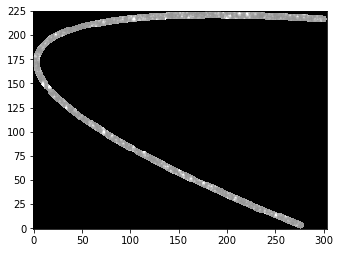

In [162]:
dir='../data/c9-ch36/*.feather'

with tqdm(total=len(fnames)) as pbar:
    fnames=glob(dir)
    df=pd.read_feather(fnames[0])
    mean, median, std = sigma_clipped_stats(df.Counts[np.isfinite(df.Counts)], sigma=3.0, iters=5)


    ar=np.zeros((int(df.X.max()-df.X.min()+1),int(df.Y.max()-df.Y.min()+1)))
    ar[np.asarray(df.X-df.X.min(),dtype=int),np.asarray(df.Y-df.Y.min(),dtype=int)]=df.Counts-median
    fig=plt.figure()
    ax=fig.add_subplot(111)

    im=ax.imshow(np.log10(ar),origin='bottom',vmin=1,vmax=4,cmap=cmap)
    def animate(i):
            df=pd.read_feather(fnames[i])
            ar[np.asarray(df.X-df.X.min(),dtype=int),np.asarray(df.Y-df.Y.min(),dtype=int)]=df.Counts
            im.set_array(np.log10(ar))
            pbar.update()
            return im,

    anim = animation.FuncAnimation(fig,animate,frames=1200, interval=15, blit=True)
    anim.save('out.mp4',dpi=150)

In [ ]:
ar1=np.copy(ar*0)
for f in fnames:
    df=pd.read_feather(f)
    ar=np.zeros((int(df.X.max()-df.X.min()+1),int(df.Y.max()-df.Y.min()+1)))
    ar[np.asarray(df.X-df.X.min(),dtype=int),np.asarray(df.Y-df.Y.min(),dtype=int)]=df.Counts
    print (np.nansum(ar1-ar))
    ar1=ar


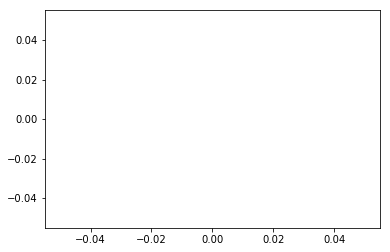

In [96]:
plt.scatter(df.X,df.Y,c=np.log10(df.Counts))

In [98]:
df=pd.read_feather(fnames[0])
df

,X,Y,Counts


In [102]:
from astropy.io import fits

In [111]:
df=pd.read_feather('../data/c13-ch13/k2mosaic-c13-ch13-cad140888.feather')

/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


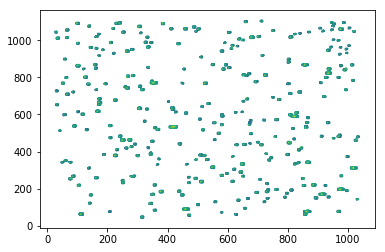

In [114]:
plt.scatter(df.X,df.Y,c=np.log10(df.Counts),s=0.1)

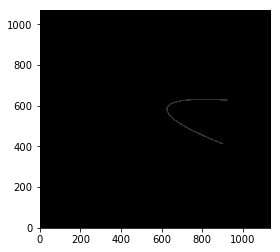

In [157]:
dir='../data/c9-ch36/'

fnames=glob('{}*.fits'.format(dir))
h=fits.open(fnames[0])
plt.figure()
plt.imshow(np.log10(h[1].data),cmap=cmap,origin='bottom',vmin=0,vmax=15)

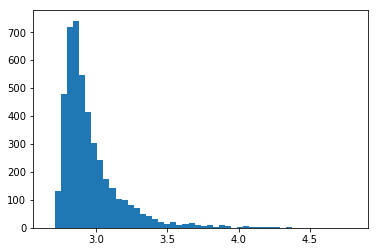

In [156]:
y=ar.ravel()
_=plt.hist(np.log10(y[y!=0]),50)